# Intro Dataset

https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data


--- 
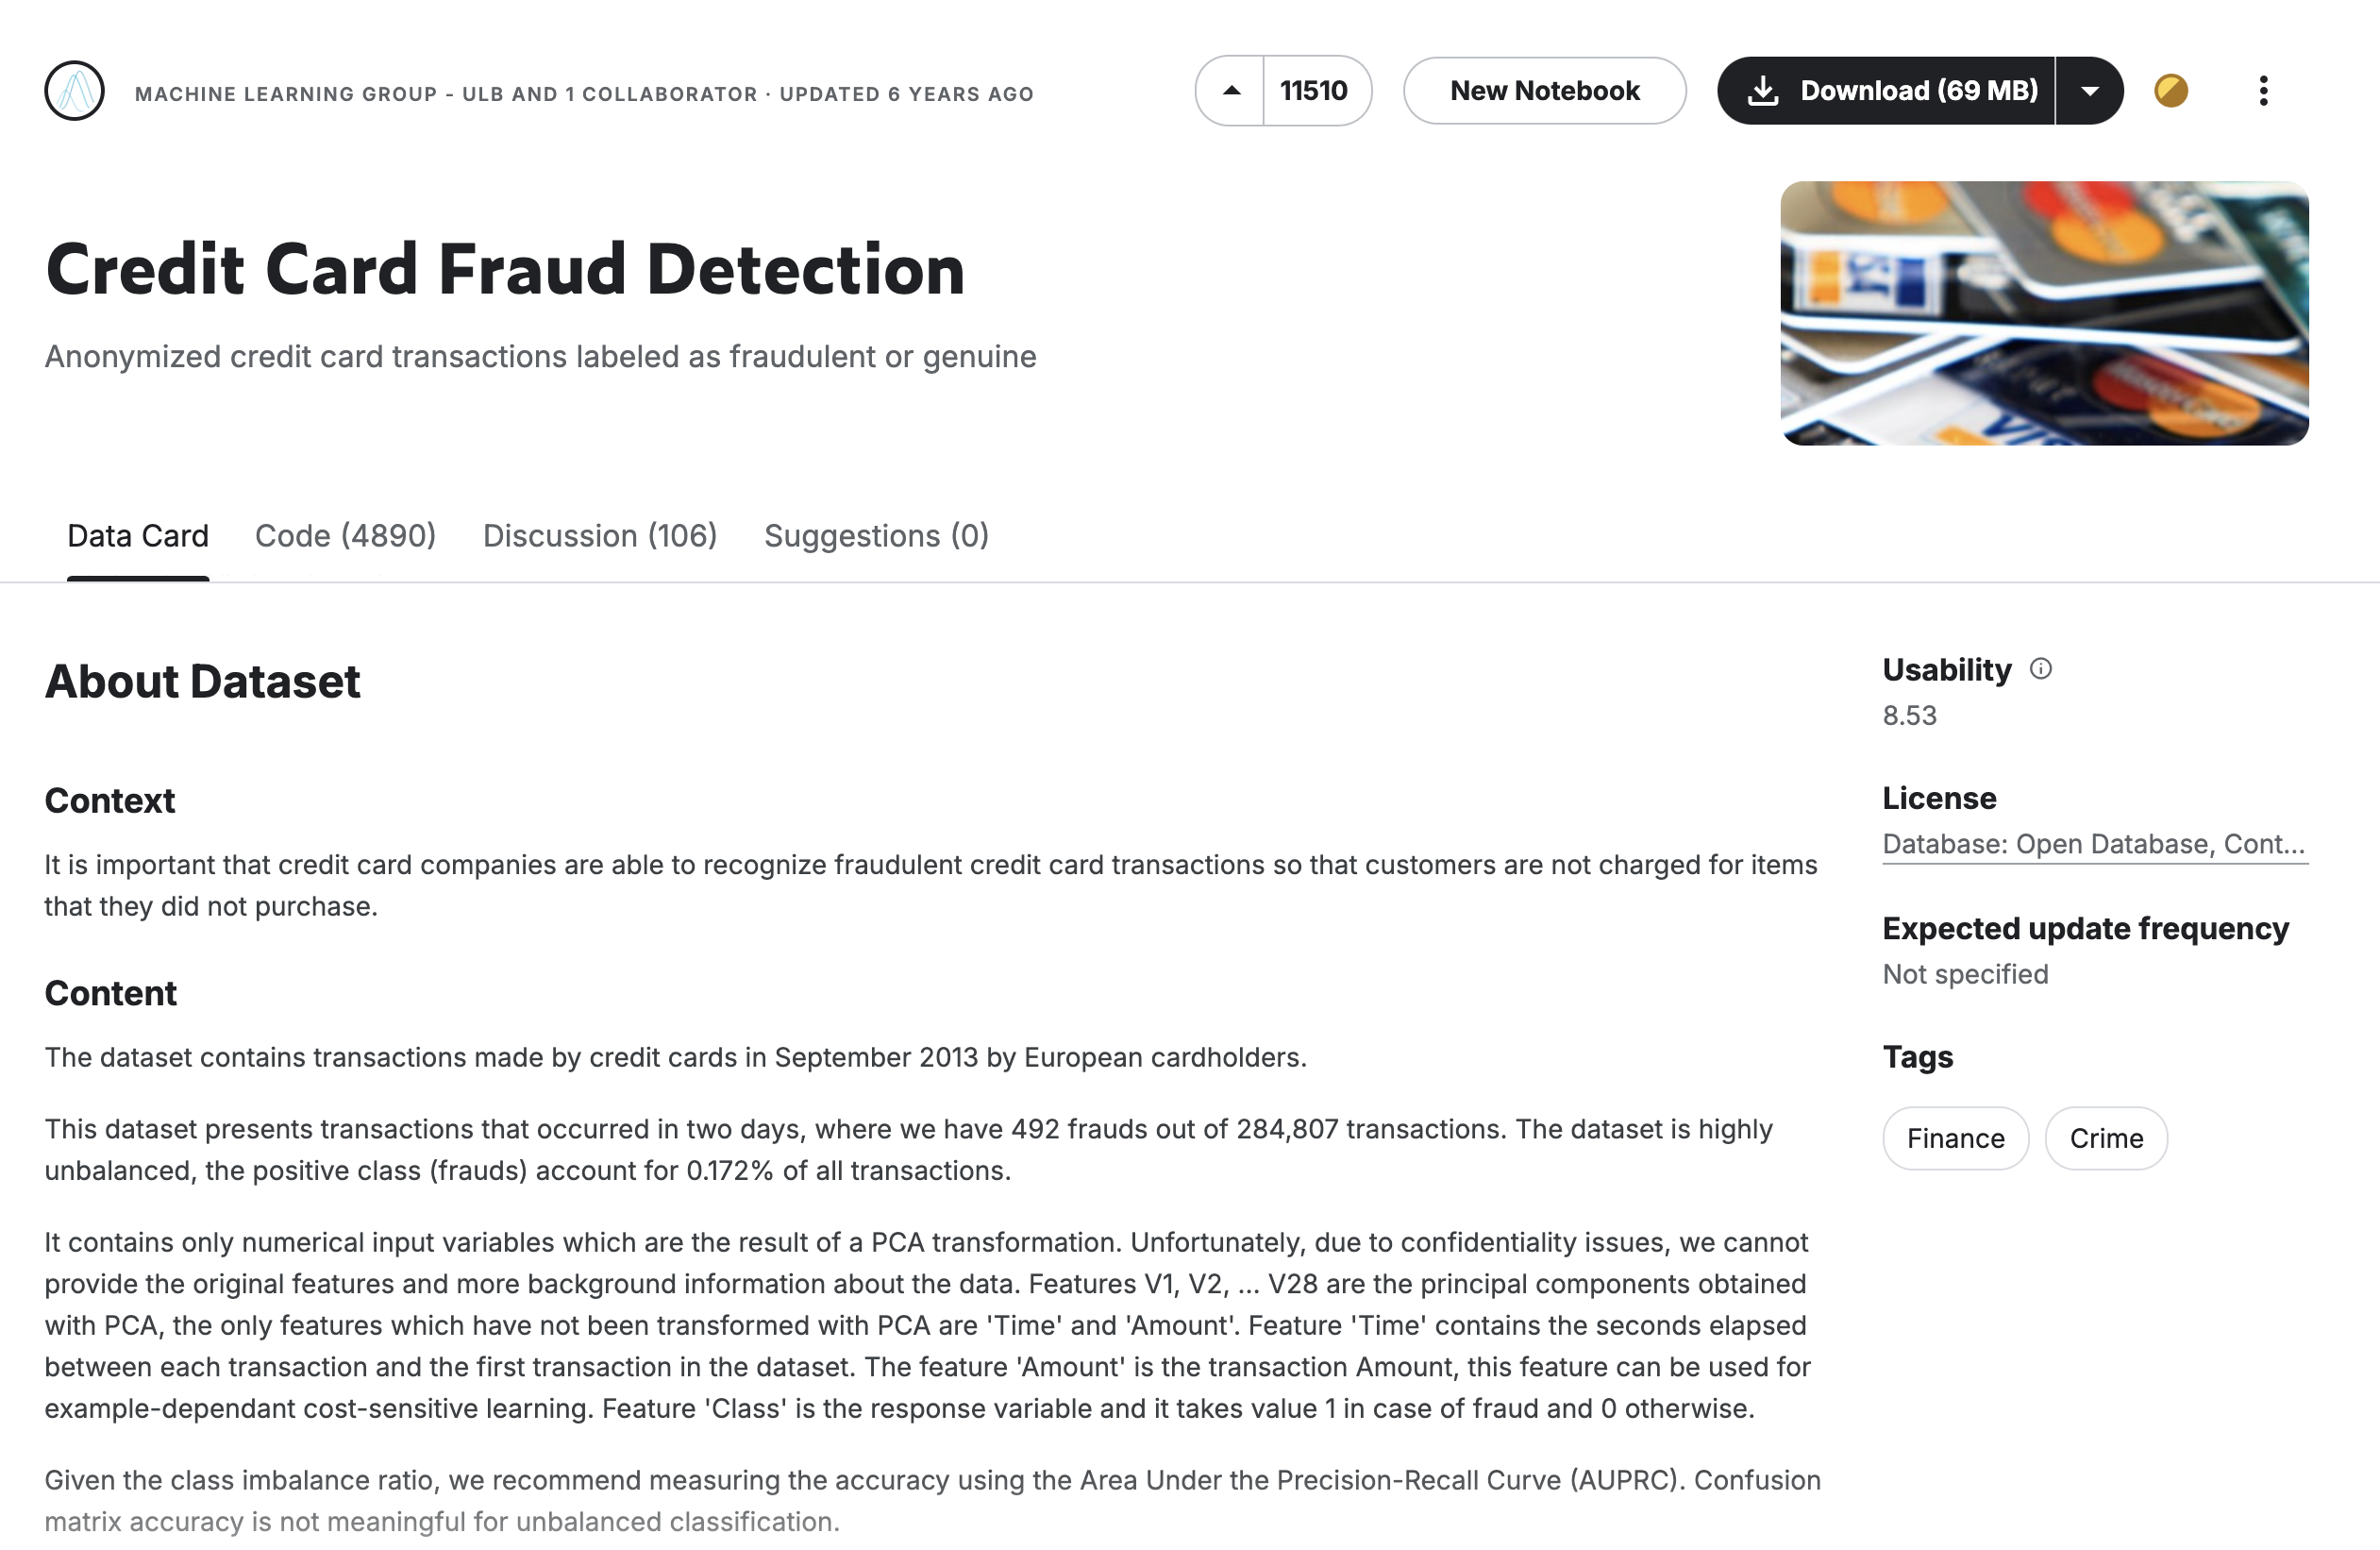

---

# Import libraries

In [1]:
# Imported Libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Classifier Libraries
from sklearn.linear_model import LogisticRegression

# Other Libraries
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, RocCurveDisplay

import warnings
warnings.filterwarnings('ignore')

# EDA 

In [2]:
df = pd.read_csv('train.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227841,145259.0,-1.329248,2.057312,0.417536,3.259226,2.031582,5.808571,-1.966416,-0.780131,-2.361387,...,-1.447473,-0.254170,0.172166,0.624782,-0.092178,0.215728,0.223553,0.132879,0.76,0
227842,145259.0,2.036041,0.259237,-1.771522,0.458296,0.584333,-0.820823,0.305824,-0.271230,0.549965,...,-0.317084,-0.740493,0.283709,0.488747,-0.063826,-0.610194,0.007487,-0.013918,9.99,0
227843,145260.0,-1.246150,0.863064,0.478690,0.405342,0.203485,0.168488,-0.136939,0.682942,-2.009559,...,-0.319465,-0.588918,-0.186107,0.468036,0.571794,-0.403076,0.259078,0.077267,56.00,0
227844,145260.0,-0.110603,0.858057,-1.273800,0.001574,2.404707,3.848640,-0.268571,1.300495,-0.729043,...,-0.089540,-0.301653,0.125633,0.700880,-0.769575,-0.193723,0.143983,0.134559,9.99,0


In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,227846.000000,227846.000000,227846.000000,227846.000000,227846.000000,227846.000000,227846.000000,227846.000000,227846.000000,227846.000000,...,227846.000000,227846.000000,227846.000000,227846.000000,227846.000000,227846.000000,227846.000000,227846.000000,227846.000000,227846.000000
mean,79043.453003,-0.066921,-0.013558,0.182861,0.043523,-0.063744,0.030640,-0.026634,0.003893,0.002425,...,-0.006639,-0.022965,-0.009877,0.001140,0.038059,0.002832,0.000182,0.001965,90.816863,0.001729
std,39506.693551,1.943296,1.657858,1.489740,1.410896,1.372940,1.321431,1.227868,1.209646,1.123265,...,0.744603,0.708626,0.630363,0.605952,0.507733,0.486706,0.400402,0.334104,250.493261,0.041548
min,0.000000,-56.407510,-72.715728,-33.680984,-5.683171,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,47694.250000,-0.948777,-0.601169,-0.570351,-0.825504,-0.749436,-0.731680,-0.568839,-0.195184,-0.661831,...,-0.225628,-0.533342,-0.167088,-0.348731,-0.272294,-0.331187,-0.069594,-0.047872,6.000000,0.000000
50%,73261.500000,-0.034545,0.067672,0.371594,0.040336,-0.122949,-0.237629,0.009801,0.033474,-0.067814,...,-0.034883,-0.011884,-0.022941,0.047811,0.075185,-0.060348,0.003527,0.015899,23.405000,0.000000
75%,120396.000000,1.241193,0.781130,1.153295,0.836102,0.531684,0.432318,0.532592,0.332212,0.613001,...,0.168343,0.471151,0.126787,0.427414,0.373668,0.253100,0.089083,0.078105,79.990000,0.000000
max,145260.000000,2.454930,22.057729,9.382558,16.875344,34.801666,22.529298,36.877368,20.007208,15.594995,...,27.202839,10.503090,19.002942,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,1.000000


In [4]:
# Good No Null Values!
df.isnull().sum().max()

0

In [5]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

## Inspect Target

In [6]:
# The classes are heavily skewed we need to solve this issue later.
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


In [7]:
df['Class'].value_counts(normalize=True), df['Class'].value_counts()

(Class
 0    0.998271
 1    0.001729
 Name: proportion, dtype: float64,
 Class
 0    227452
 1       394
 Name: count, dtype: int64)

Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

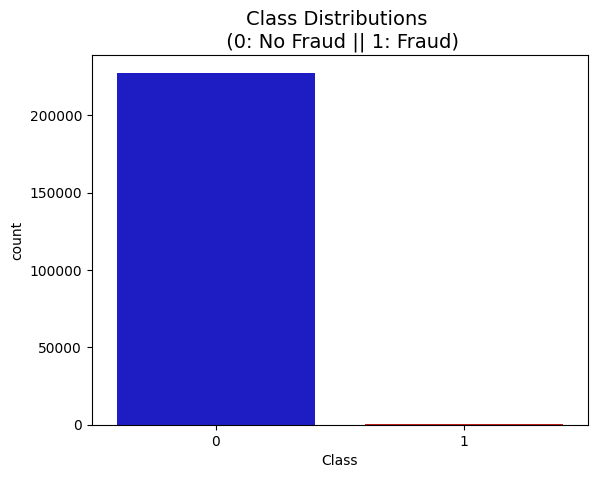

In [8]:
colors = ["#0101DF", "#DF0101"]

sns.countplot(x='Class', data=df, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

## Inspect Transaction data

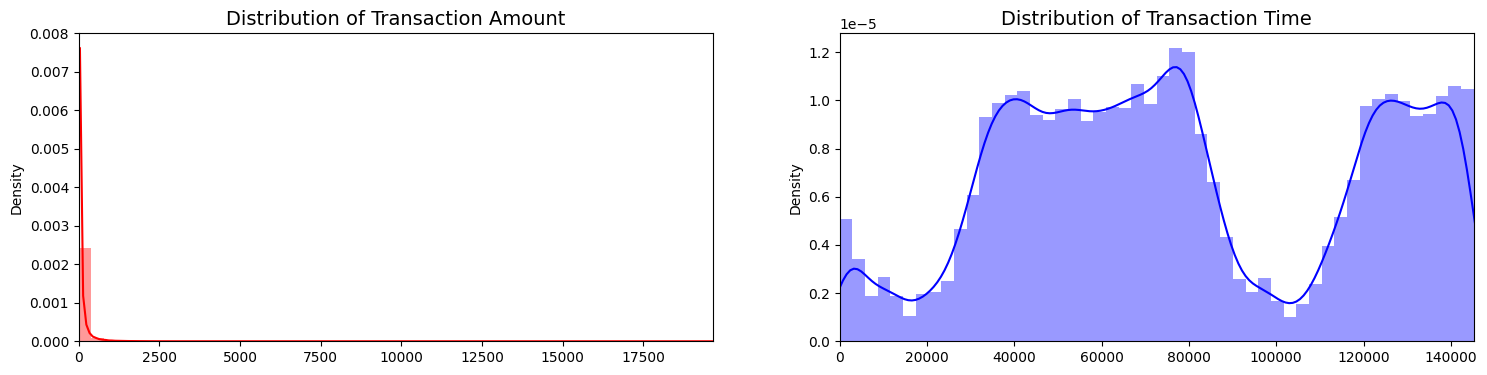

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()

## Check Correlation

Text(0.5, 1.0, "Imbalanced Correlation Matrix \n (don't use for reference)")

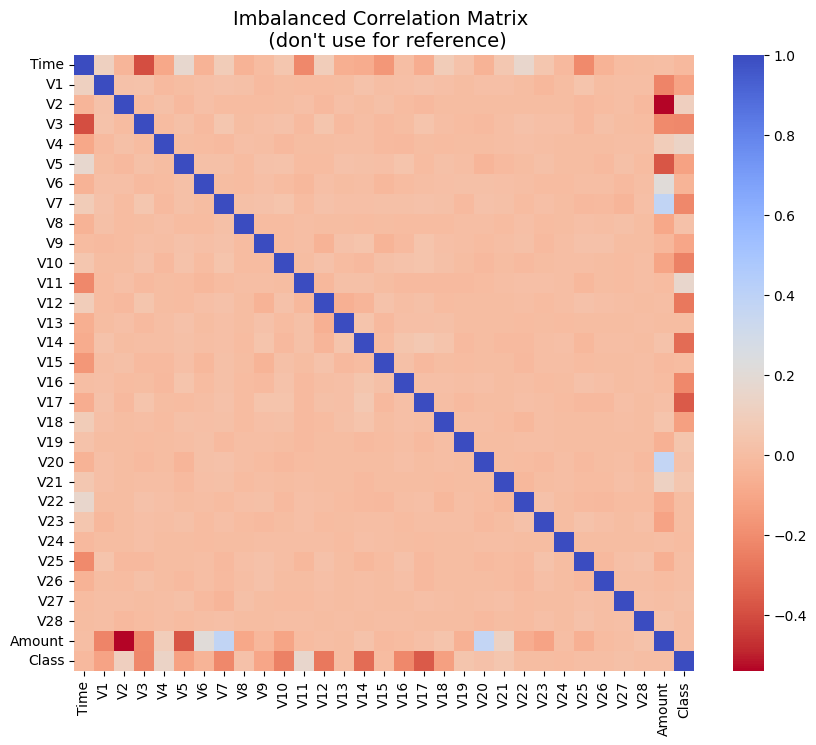

In [10]:
# Make sure we use the subsample in our correlation

f, ax1 = plt.subplots(1, 1, figsize=(10,8))

# Entire DataFrame
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)

In [11]:
corr['Class'].sort_values()

V17      -0.364683
V14      -0.309486
V12      -0.269397
V10      -0.239750
V7       -0.219486
V16      -0.219113
V3       -0.218940
V18      -0.130780
V5       -0.119614
V1       -0.117735
V9       -0.101725
V6       -0.044849
Time     -0.016933
V15      -0.006066
V24      -0.004690
V23      -0.002557
V13      -0.001748
V22       0.000619
V25       0.002287
V26       0.003029
Amount    0.005376
V28       0.007278
V27       0.018928
V20       0.020551
V8        0.022732
V19       0.039482
V21       0.043864
V2        0.104403
V4        0.138418
V11       0.163426
Class     1.000000
Name: Class, dtype: float64

As you can see, 

- Top 4 negative correlated features with Class label is: V17, V14, V12, V10

- Top 4 positive correlated features with Class label is: V11, V4, V2, V21

Let's check the boxplots of these features

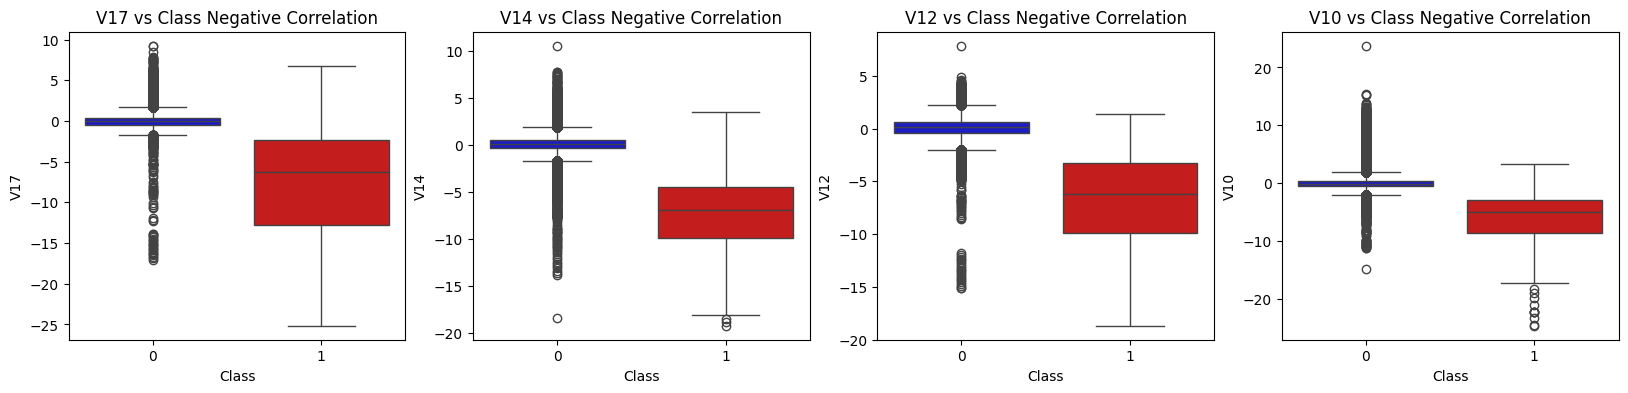

In [12]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V17", data=df, palette=colors, ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=df, palette=colors, ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V12", data=df, palette=colors, ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V10", data=df, palette=colors, ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

plt.show()

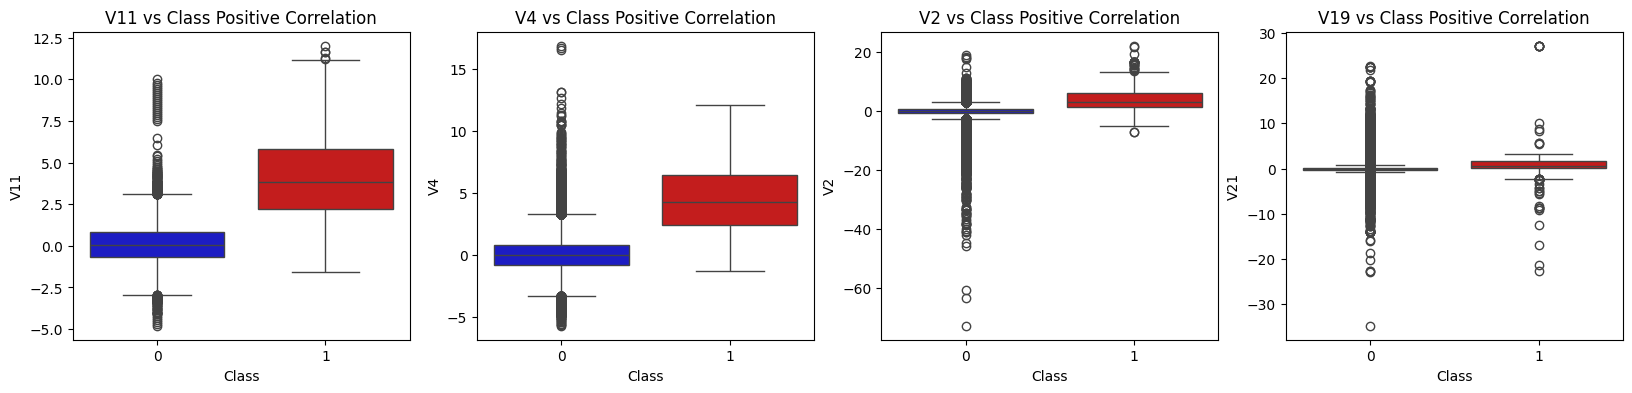

In [13]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x="Class", y="V11", data=df, palette=colors, ax=axes[0])
axes[0].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=df, palette=colors, ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V2", data=df, palette=colors, ax=axes[2])
axes[2].set_title('V2 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V21", data=df, palette=colors, ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show()

## Outlier Removal

### Interquartile Range Method
<li> <b>Interquartile Range (IQR): </b> We calculate this by the difference between the 75th percentile and 25th percentile. Our aim is to create a threshold beyond the 75th and 25th percentile that in case some instance pass this threshold the instance will be deleted.  </li>
<li> <b>Boxplots: </b> Besides easily seeing the 25th and 75th percentiles (both end of the squares) it is also easy to see extreme outliers (points beyond the lower and higher extreme). </li>
</ul>

### Outlier Removal Tradeoff
We have to be careful as to how far do we want the threshold for removing outliers. We determine the threshold by multiplying a number (ex: 1.5) by the (Interquartile Range). The higher this threshold is, the less outliers will detect (multiplying by a higher number ex: 3), and the lower this threshold is the more outliers it will detect.  <br><br>

**The Tradeoff**

The lower the threshold the more outliers it will remove however, we want to focus more on "extreme outliers" rather than just outliers. Why? because we might run the risk of information loss which will cause our models to have a lower accuracy. You can play with this threshold and see how it affects the accuracy of our classification models.

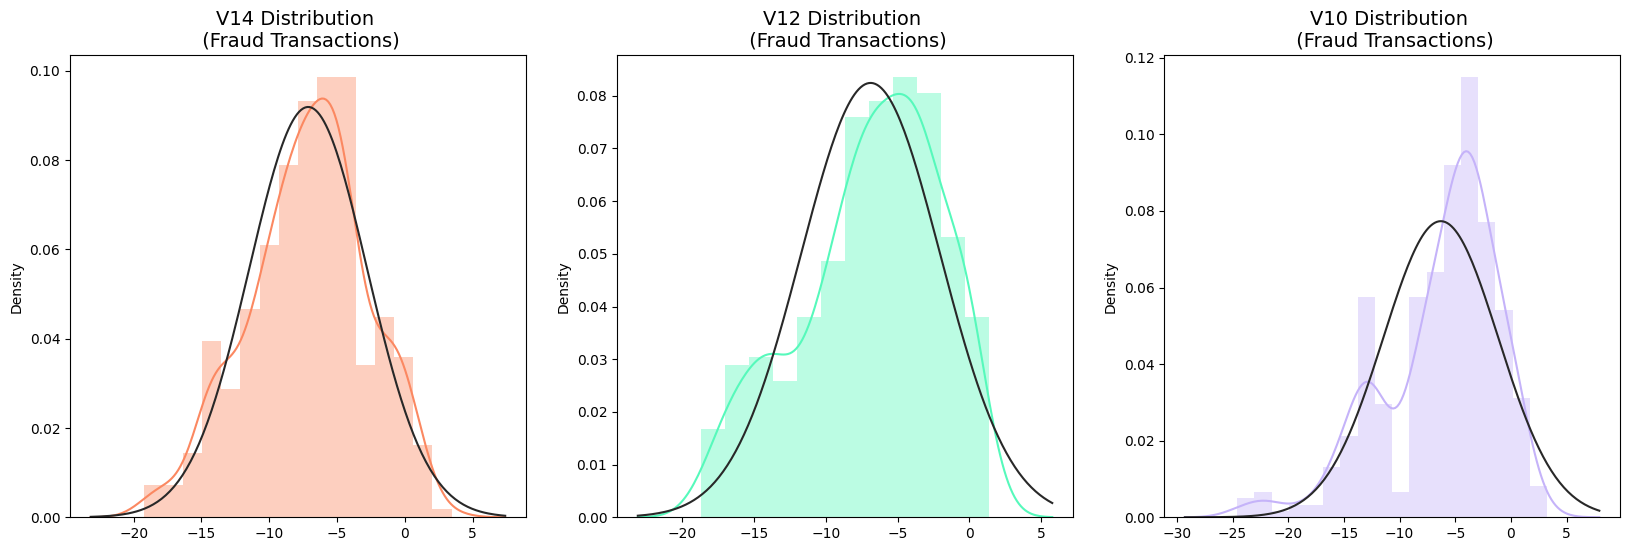

In [14]:
from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

v14_fraud_dist = df['V14'].loc[df['Class'] == 1].values
sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = df['V12'].loc[df['Class'] == 1].values
sns.distplot(v12_fraud_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)


v10_fraud_dist = df['V10'].loc[df['Class'] == 1].values
sns.distplot(v10_fraud_dist,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

In [15]:
# # -----> V14 Removing Outliers (Highest Negative Correlated with Labels)
v14_fraud = df['V14'].loc[df['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v14_iqr = q75 - q25
print('iqr: {}'.format(v14_iqr))

v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print('Cut Off: {}'.format(v14_cut_off))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))

outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V10 outliers:{}'.format(outliers))

df = df.drop(df[(df['V14'] > v14_upper) | (df['V14'] < v14_lower)].index)
print('----' * 44)

# -----> V12 removing outliers from fraud transactions
v12_fraud = df['V12'].loc[df['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25

v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))
outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('V12 outliers: {}'.format(outliers))
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))
df = df.drop(df[(df['V12'] > v12_upper) | (df['V12'] < v12_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(df)))
print('----' * 44)


# Removing outliers V10 Feature
v10_fraud = df['V10'].loc[df['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25

v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_upper))
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('V10 outliers: {}'.format(outliers))
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))
df = df.drop(df[(df['V10'] > v10_upper) | (df['V10'] < v10_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(df)))

Quartile 25: -9.90367955711898 | Quartile 75: -4.45943407401596
iqr: 5.44424548310302
Cut Off: 8.16636822465453
V14 Lower: -18.07004778177351
V14 Upper: 3.7069341506385696
Feature V14 Outliers for Fraud Cases: 3
V10 outliers:[-19.2143254902614, -18.8220867423816, -18.4937733551053]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V12 Lower: -19.19195762901535
V12 Upper: 6.300097759970992
V12 outliers: []
Feature V12 Outliers for Fraud Cases: 0
Number of Instances after outliers removal: 227580
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V10 Lower: -17.048009183490088
V10 Upper: 5.680649460968949
V10 outliers: [-18.2711681738888, -22.1870885620007, -22.1870885620007, -22.1870885620007, -22.1870885620007, -17.1415136412892, -18.913

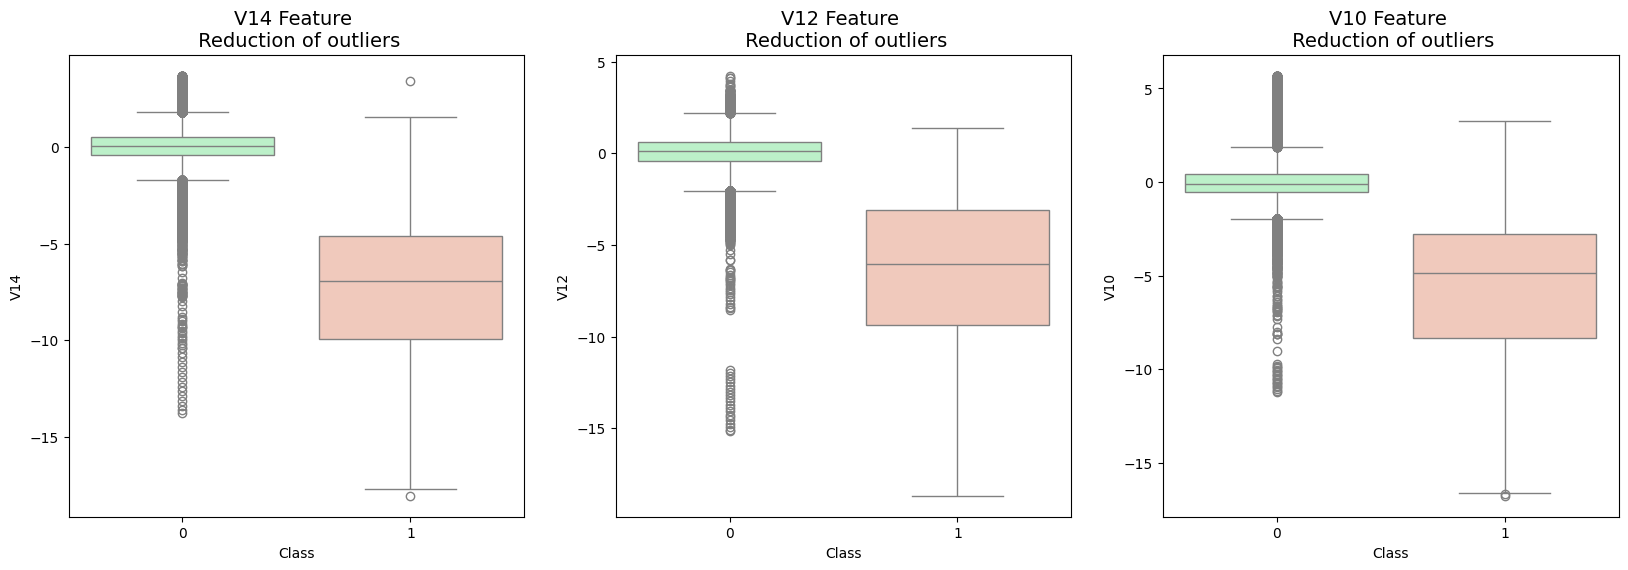

In [16]:
f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

colors = ['#B3F9C5', '#f9c5b3']
# Boxplots with outliers removed
# Feature V14
sns.boxplot(x="Class", y="V14", data=df,ax=ax1, palette=colors)
ax1.set_title("V14 Feature \n Reduction of outliers", fontsize=14)

# Feature 12
sns.boxplot(x="Class", y="V12", data=df, ax=ax2, palette=colors)
ax2.set_title("V12 Feature \n Reduction of outliers", fontsize=14)

# Feature V10
sns.boxplot(x="Class", y="V10", data=df, ax=ax3, palette=colors)
ax3.set_title("V10 Feature \n Reduction of outliers", fontsize=14)

plt.show()

# Load Train/Test Data

For lab purpose, only 8 features are selected:
- Top 4 positive correlated features
- Top 4 negative correlated features

In [17]:
sel_cols = ['V17', 'V14', 'V12', 'V10', 'V11', 'V4', 'V2', 'V19', 'Class']

In [18]:
train_data = df[sel_cols]
test_data = pd.read_csv('test.csv', index_col=0)[sel_cols]

In [19]:
train_data

,V17,V14,V12,V10,V11,V4,V2,V19,Class
0,0.207971,-0.311169,-0.617801,0.090794,-0.551600,1.378155,-0.072781,0.403993,0
1,-0.114805,-0.143772,1.065235,-0.166974,1.612727,0.448154,0.266151,-0.145783,0
2,1.109969,-0.165946,0.066084,0.207643,0.624501,0.379780,-1.340163,-2.261857,0
3,-0.684093,-0.287924,0.178228,-0.054952,-0.226487,-0.863291,-0.185226,-1.232622,0
4,-0.237033,-1.119670,0.538196,0.753074,-0.822843,0.403034,0.877737,0.803487,0
...,...,...,...,...,...,...,...,...,...
227841,0.318950,0.849992,-0.312278,0.690474,-0.529497,3.259226,2.057312,0.940716,0
227842,0.578979,-1.095190,0.758272,-0.648271,-0.304627,0.458296,0.259237,-0.023326,0
227843,1.710821,-1.886214,0.186052,-0.477580,1.106494,0.405342,0.863064,-0.277785,0
227844,0.752186,0.989084,0.151986,-0.268449,-0.104774,0.001574,0.858057,2.769259,0


In [20]:
test_data

,V17,V14,V12,V10,V11,V4,V2,V19,Class
Time,,,,,,,,,
138894.0,-7.550968,-3.828268,-5.418889,-4.501315,2.093075,1.305805,1.948100,0.152892,1
138942.0,-5.522088,-7.132151,-5.694074,-6.564659,2.450752,1.772205,1.746360,-0.663371,1
139107.0,-0.102946,-0.729707,-0.578914,4.031435,0.983647,5.153525,-3.952320,1.060154,1
139117.0,-6.419539,-6.964972,-4.563675,-4.250717,4.182162,4.544772,-1.244939,3.569733,1
139767.0,-5.856998,-7.914989,-5.019610,-5.416037,4.497929,2.204714,1.100118,-0.173814,1
...,...,...,...,...,...,...,...,...,...
172786.0,1.991691,4.626942,2.711941,4.356170,-1.593105,-2.066656,10.071785,-0.682920,0
172787.0,-0.025693,-0.675143,0.915802,-0.975926,-0.150189,-0.738589,-0.055080,-1.545556,0
172788.0,0.313502,-0.510602,0.063119,-0.484782,0.411614,-0.557828,-0.301254,-0.577252,0


In [21]:
X_train, y_train = train_data.drop(columns=['Class']), train_data['Class']
X_test, y_test = test_data.drop(columns=['Class']), test_data['Class']

In [22]:
# check again 
X_train.shape, y_train.shape

((226683, 8), (226683,))

In [23]:
X_test.shape, y_test.shape

((56961, 8), (56961,))

In [24]:
# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

# Model: Logistic Regression

In [25]:
model = LogisticRegression()

In [26]:
model.fit(X_train, y_train)

LogisticRegression()

# Evaluation

<b>Classification Metric</b>

In [27]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.92      0.45      0.60        98

    accuracy                           1.00     56961
   macro avg       0.96      0.72      0.80     56961
weighted avg       1.00      1.00      1.00     56961



In [29]:
acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [30]:
print(f'Accuracy: {acc * 100:.2f}')
print(f'Precision: {pre* 100:.2f}, Recall: {rec* 100:.2f}, F1-score: {f1* 100:.2f}')

Accuracy: 99.90
Precision: 91.67, Recall: 44.90, F1-score: 60.27


In [31]:
con_mat = confusion_matrix(y_test, y_pred, labels=model.classes_)
tn, fp, fn, tp = con_mat.ravel()

In [32]:
tn, fp, fn, tp

(56859, 4, 54, 44)

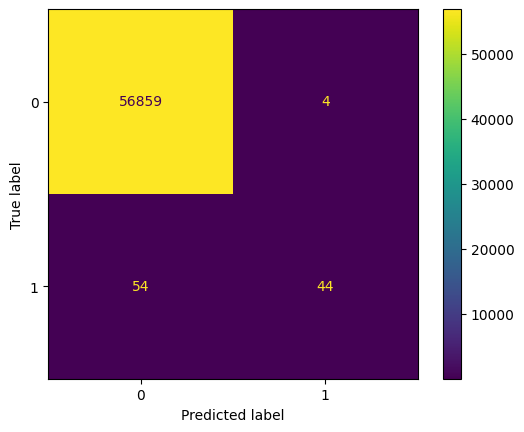

In [33]:
disp = ConfusionMatrixDisplay(confusion_matrix=con_mat, display_labels=model.classes_)
disp.plot()

# Challenge

- Can you do better ? 

- Which metrics will you use and explain why?